***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
from sklearn.datasets import load_breast_cancer

In [92]:
cancer = load_breast_cancer()

In [93]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [94]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [95]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [96]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info(), df_feat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None,
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst radius  worst texture  worst per

In [97]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
X = df_feat.values
y = df_target.values
X.shape, y.shape

((569, 30), (569, 1))

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/5, random_state = 0)
y_test.shape, X_test.shape

((114, 1), (114, 30))

In [109]:
svc = SVC(kernel='linear')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred), y_pred

(array([[45,  2],
        [ 1, 66]], dtype=int64),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 1]))

In [100]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_vec = []
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc = svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy_vec.append(accuracy_score(y_test, y_pred))
accuracy_vec


[0.9736842105263158, 0.9035087719298246, 0.9736842105263158, 0.956140350877193]

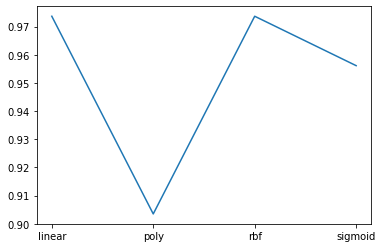

In [101]:
import matplotlib.pyplot as py
plt.plot(kernels, accuracy_vec)

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [110]:
#TO GET OUR PARAMETERS WE ARE GONNA USE CROSS VALIDATION
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
        'degree': list(range(1, 10)),
        'gamma': ['scale', 'auto']},

svc = SVR()
clf = GridSearchCV(svc, param)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
np.mean(y_pred)

0.5985622939218344

{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

In [103]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.)


In [104]:
best_param = clf.best_params_
best_param


{'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1}

In [105]:
best_score = clf.best_score_
best_score 

0.8419448805248656

In [113]:
cutoff = 0.6                              
y_pred_classes = np.zeros_like(y_pred)    
y_pred_classes[y_pred > cutoff] = 1
y_pred_classes
confusion_matrix(y_test, y_pred_classes)

array([[46,  1],
       [ 2, 65]], dtype=int64)

# Discussion of results